In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from skimage import draw
from skimage.transform import resize
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

from euclid_morphology import cutouts


def create_plots(image, seg, catalog, cutout_pixels=300, n_examples=30):
    _, ax = plt.subplots(ncols=8, nrows=n_examples, figsize=(8 * 8, 8 * n_examples))

    for i in tqdm(range(n_examples)):
        params = cutouts.extract_params_by_source_index(catalog, np.random.randint(0, len(catalog)))
        ref_seg = seg[int(params[2]) - 64: int(params[2]) + 64, int(params[1]) - 64: int(params[1]) + 64]
        ref_img = image[int(params[2]) - 64: int(params[2]) + 64, int(params[1]) - 64: int(params[1]) + 64]
        seg_cutout = cutouts.get_cutout_from_seg_map(seg, image, params[-1])
        axes = params[['SEMIMAJOR_AXIS', 'SEMIMINOR_AXIS']].values
        rows, cols = draw.ellipse(r=params[1], c=params[2], r_radius=axes[0], c_radius=axes[1], shape=seg.shape)
        ellipse = np.zeros_like(seg)
        ellipse[cols, rows] = 1
        maj_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)
        rows, cols = draw.ellipse(r=params[1], c=params[2], r_radius=3 * axes[0], c_radius=3 * axes[1], shape=seg.shape)
        ellipse = np.zeros_like(seg)
        ellipse[cols, rows] = 1
        maj3_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)

        seg_resized = resize(seg_cutout, output_shape=(cutout_pixels, cutout_pixels))
        maj_resized = resize(maj_cutout, output_shape=(cutout_pixels, cutout_pixels))
        maj3_resized = resize(maj3_cutout, output_shape=(cutout_pixels, cutout_pixels))

        ax[i, 0].imshow(ref_img, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 0].set_title('Reference Image Cutouts')
        ax[i, 1].imshow(ref_seg, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 1].set_title('Reference Segmentation Cutout')
        ax[i, 2].imshow(seg_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 2].set_title('Segmentation Derived Cutouts')
        ax[i, 3].imshow(maj_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 3].set_title('Major Axis Derived Cutouts')
        ax[i, 4].imshow(maj3_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 4].set_title('3x Major Axis Derived Cutouts')
        ax[i, 5].imshow(seg_resized, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 5].set_title('Segmentation Derived Cutouts Resized')
        ax[i, 6].imshow(maj_resized, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 6].set_title('Major Axis Derived Cutouts Resized')
        ax[i, 7].imshow(maj3_resized, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 7].set_title('3x Major Axis Derived Cutouts Resized')
    plt.tight_layout()
    plt.show()



In [3]:
repo_root = Path(os.path.dirname(os.getcwd()))
data_dir = repo_root / 'data/example_tile'
data_dir

PosixPath('/nvme1/scratch/walml/repos/zoobot-euclid/data/example_tile')

In [4]:
catalog_file = data_dir / 'EUC_MER_FINAL-CUTOUTS-CAT_TILE100158586-2F9FF9_20220829T221845.491503Z_00.00.fits'
mosaic_file = data_dir / 'EUC_MER_BGSUB-MOSAIC-VIS_TILE100158586-863FA9_20220829T190315.054985Z_00.00.fits'
segmentation_file = data_dir / 'EUC_MER_FINAL-SEGMAP_TILE100158586-CB5786_20220829T221845.491530Z_00.00.fits'


In [10]:
image, seg, catalog = cutouts.load_data_for_mosaic(catalog_file, segmentation_file, mosaic_file)

In [15]:
len(catalog)

21529

In [8]:
source_index = 400

In [12]:
cutout = cutouts.prepare_image(image, seg, catalog, source_index, mode='seg', m=1.5)

In [14]:
cutout_maj = cutouts.prepare_image(image, seg, catalog, source_index, mode='maj', m=1.5)

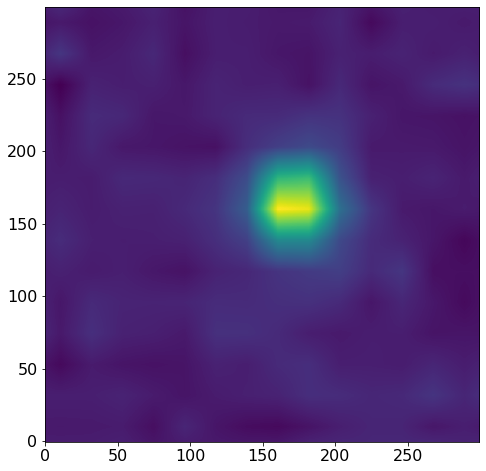

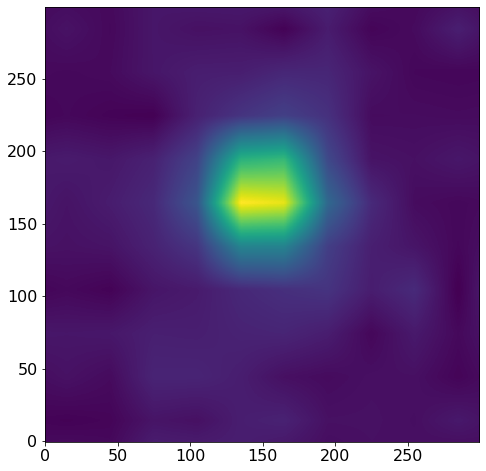

 17%|█▋        | 5/30 [00:21<01:48,  4.35s/it]

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(cutout[0, :, :, 0], origin='lower', cmap='viridis')
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(cutout_maj[0, :, :, 0], origin='lower', cmap='viridis')
plt.show()

# 30 examples * 6ish cutout versions = ~180 seconds 
create_plots(image, seg, catalog, n_examples=30)